# Sentiment analysis using Twitter Data.

#In this project 
Tweets analysis will be covered.


### Importing all Libraries

In [250]:
#!pip install tweepy

In [251]:
#import os
##import logging
#import tweepy as tw
from tqdm import tqdm, notebook
#to avoid unnecesary warnings
import warnings
warnings.filterwarnings('ignore')
#Importing Python libraries
import numpy as np
import pandas as pd
 #For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import requests
#For Scraping the Data
from bs4 import BeautifulSoup
from datetime import date,datetime
import re
import time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [252]:
 #For Visualization
!pip install plotly==5.5.0

In [253]:
#For Visualization
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import gc
#from pandas.profiling import profileReport

In [254]:
import snscrape.modules.twitter as sntwitter
import pandas as pd 
from tqdm import tqdm,notebook

# Creating list to append tweet data to
tweets_list2 = []
tweets_list3 = []
#p=input("Enter the tweet search")

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Covid-19 vaccine').get_items()):
    #print(tweet.source)
    if i>50:
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
    tweets_list3.append([tweet])
    
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

tweets_df3 = pd.DataFrame(tweets_list3)


In [255]:
tweets_df2

,Datetime,Tweet Id,Text,Username
0,2022-03-01 06:15:38+00:00,1498542457994289152,KS: Rapid Test appointments available at CVS L...,kcvaccinewatch
1,2022-03-01 06:15:37+00:00,1498542456434003970,MO: Rapid Test appointments available at CVS L...,kcvaccinewatch
2,2022-03-01 06:15:37+00:00,1498542455033143296,MO: PCR Test appointments available at CVS BAN...,kcvaccinewatch
3,2022-03-01 06:15:36+00:00,1498542450276712449,KS: PCR Test appointments available at CVS MIS...,kcvaccinewatch
4,2022-03-01 06:15:35+00:00,1498542447747637249,KS: PCR Test appointments available at CVS NIE...,kcvaccinewatch
5,2022-03-01 06:15:35+00:00,1498542446292213763,MO: PCR Test appointments available at CVS EAS...,kcvaccinewatch
6,2022-03-01 06:15:06+00:00,1498542325827440644,"@IngrahamAngle Dr. Malone: ""Your risk of getti...",healthestore
7,2022-03-01 06:13:49+00:00,1498542003004473345,@markonhiatus @AJKayWriter @TheEconomist It ap...,goldencell
8,2022-03-01 06:12:44+00:00,1498541730878017540,"@JikkyKjj Dr. Malone: ""Your risk of getting in...",healthestore
9,2022-03-01 06:12:37+00:00,1498541698569617409,Over 177.45 crore COVID-19 vaccine doses suppl...,RisingKashmir


In [256]:
tweets_copy = []
for tweet in tqdm(tweets_list3):
     tweets_copy.append(tweet)

100%|███████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 34143.58it/s]


In [257]:
tweets_copy

[[Tweet(url='https://twitter.com/kcvaccinewatch/status/1498542457994289152', date=datetime.datetime(2022, 3, 1, 6, 15, 38, tzinfo=datetime.timezone.utc), content='KS: Rapid Test appointments available at CVS LENEXA - W 87TH STREET PKWY POCT Covid -19 Testing Site Lane 3 on Mar 01. Sign up here, zip code 66215:\nhttps://t.co/uv9JLWcEXD', renderedContent='KS: Rapid Test appointments available at CVS LENEXA - W 87TH STREET PKWY POCT Covid -19 Testing Site Lane 3 on Mar 01. Sign up here, zip code 66215:\ntinyurl.com/yzb8p53c', id=1498542457994289152, user=User(username='kcvaccinewatch', id=1366795232491294720, displayname='KC Vaccine Watch (Now finding COVID Tests)', description='Notifying you when COVID-19 test appointments are available in the KC area. Looks at the next couple days only.', rawDescription='Notifying you when COVID-19 test appointments are available in the KC area. Looks at the next couple days only.', descriptionUrls=None, verified=False, created=datetime.datetime(2021, 3

In [258]:
tweets_df2

,Datetime,Tweet Id,Text,Username
0,2022-03-01 06:15:38+00:00,1498542457994289152,KS: Rapid Test appointments available at CVS L...,kcvaccinewatch
1,2022-03-01 06:15:37+00:00,1498542456434003970,MO: Rapid Test appointments available at CVS L...,kcvaccinewatch
2,2022-03-01 06:15:37+00:00,1498542455033143296,MO: PCR Test appointments available at CVS BAN...,kcvaccinewatch
3,2022-03-01 06:15:36+00:00,1498542450276712449,KS: PCR Test appointments available at CVS MIS...,kcvaccinewatch
4,2022-03-01 06:15:35+00:00,1498542447747637249,KS: PCR Test appointments available at CVS NIE...,kcvaccinewatch
5,2022-03-01 06:15:35+00:00,1498542446292213763,MO: PCR Test appointments available at CVS EAS...,kcvaccinewatch
6,2022-03-01 06:15:06+00:00,1498542325827440644,"@IngrahamAngle Dr. Malone: ""Your risk of getti...",healthestore
7,2022-03-01 06:13:49+00:00,1498542003004473345,@markonhiatus @AJKayWriter @TheEconomist It ap...,goldencell
8,2022-03-01 06:12:44+00:00,1498541730878017540,"@JikkyKjj Dr. Malone: ""Your risk of getting in...",healthestore
9,2022-03-01 06:12:37+00:00,1498541698569617409,Over 177.45 crore COVID-19 vaccine doses suppl...,RisingKashmir


In [259]:
tweets_df2.dtypes

Datetime    datetime64[ns, UTC]
Tweet Id                  int64
Text                     object
Username                 object
dtype: object

# Data Cleaning for Twitter Data

In [260]:
!pip install neattext

In [261]:
#for data cleaning
import neattext.functions as nfx

In [262]:
#df_tw['text']
tweets_df2['Text']

0     KS: Rapid Test appointments available at CVS L...
1     MO: Rapid Test appointments available at CVS L...
2     MO: PCR Test appointments available at CVS BAN...
3     KS: PCR Test appointments available at CVS MIS...
4     KS: PCR Test appointments available at CVS NIE...
5     MO: PCR Test appointments available at CVS EAS...
6     @IngrahamAngle Dr. Malone: "Your risk of getti...
7     @markonhiatus @AJKayWriter @TheEconomist It ap...
8     @JikkyKjj Dr. Malone: "Your risk of getting in...
9     Over 177.45 crore COVID-19 vaccine doses suppl...
10    @mdccclxx Dr. Malone: "Your risk of getting in...
11    @profnfenton Dr. Malone: "Your risk of getting...
12    Covid-19 and All-Cause Mortality Data by Age G...
13    Vergeire says there is enough COVID-19 vaccine...
14    @ClareCraigPath Dr. Malone: "Your risk of gett...
15    Dr. Malone: "Your risk of getting infected and...
16    @LiamBartlett9 @KariLake Moderna and it’s pate...
17    What is RelCoVax, Covid-19 Vaccine Dr Robe

In [263]:
#df_tw.head()
tweets_df2.head()

,Datetime,Tweet Id,Text,Username
0,2022-03-01 06:15:38+00:00,1498542457994289152,KS: Rapid Test appointments available at CVS L...,kcvaccinewatch
1,2022-03-01 06:15:37+00:00,1498542456434003970,MO: Rapid Test appointments available at CVS L...,kcvaccinewatch
2,2022-03-01 06:15:37+00:00,1498542455033143296,MO: PCR Test appointments available at CVS BAN...,kcvaccinewatch
3,2022-03-01 06:15:36+00:00,1498542450276712449,KS: PCR Test appointments available at CVS MIS...,kcvaccinewatch
4,2022-03-01 06:15:35+00:00,1498542447747637249,KS: PCR Test appointments available at CVS NIE...,kcvaccinewatch


# Data Cleaning

In [173]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [264]:
tweets_df2['Text']=tweets_df2['Text'].apply(lambda x: nfx.remove_userhandles(x))

In [265]:
tweets_df2['Text']

0     KS: Rapid Test appointments available at CVS L...
1     MO: Rapid Test appointments available at CVS L...
2     MO: PCR Test appointments available at CVS BAN...
3     KS: PCR Test appointments available at CVS MIS...
4     KS: PCR Test appointments available at CVS NIE...
5     MO: PCR Test appointments available at CVS EAS...
6       Dr. Malone: "Your risk of getting infected a...
7           It appears that the term may also be use...
8       Dr. Malone: "Your risk of getting infected a...
9     Over 177.45 crore COVID-19 vaccine doses suppl...
10      Dr. Malone: "Your risk of getting infected a...
11      Dr. Malone: "Your risk of getting infected a...
12    Covid-19 and All-Cause Mortality Data by Age G...
13    Vergeire says there is enough COVID-19 vaccine...
14      Dr. Malone: "Your risk of getting infected a...
15    Dr. Malone: "Your risk of getting infected and...
16        Moderna and it’s patent for covid 19 that ...
17    What is RelCoVax, Covid-19 Vaccine Dr Robe

In [266]:
#df_tw['clean_tweet']=df_tw['clean_tweet'].apply(lambda x: nfx.remove_multiple_spaces(x))
tweets_df2['Text']=tweets_df2['Text'].apply(lambda x: nfx.remove_multiple_spaces(x))

In [267]:
tweets_df2['Text']

0     KS: Rapid Test appointments available at CVS L...
1     MO: Rapid Test appointments available at CVS L...
2     MO: PCR Test appointments available at CVS BAN...
3     KS: PCR Test appointments available at CVS MIS...
4     KS: PCR Test appointments available at CVS NIE...
5     MO: PCR Test appointments available at CVS EAS...
6      Dr. Malone: "Your risk of getting infected an...
7      It appears that the term may also be used to ...
8      Dr. Malone: "Your risk of getting infected an...
9     Over 177.45 crore COVID-19 vaccine doses suppl...
10     Dr. Malone: "Your risk of getting infected an...
11     Dr. Malone: "Your risk of getting infected an...
12    Covid-19 and All-Cause Mortality Data by Age G...
13    Vergeire says there is enough COVID-19 vaccine...
14     Dr. Malone: "Your risk of getting infected an...
15    Dr. Malone: "Your risk of getting infected and...
16     Moderna and it’s patent for covid 19 that dat...
17    What is RelCoVax, Covid-19 Vaccine Dr Robe

In [268]:
#df_tw['clean_tweet'].iloc[20]
tweets_df2['Text'].iloc[20]

'KS: PCR Test appointments available at CVS ANTIOCH OVERLAND PARK Covid - 19 Testing Site on Mar 01. Sign up here, zip code 66213:\nhttps://t.co/uv9JLWcEXD'

In [269]:
#df_tw['clean_tweet']=df_tw['clean_tweet'].apply(lambda x:re.sub(r"\S*https?:\S*", "", str(x)))#sub(r"https://t.co/""*","",str(x))
#df_tw['clean_tweet']
tweets_df2['Text']=tweets_df2['Text'].apply(lambda x:re.sub(r"\S*https?:\S*", "", str(x)))#sub(r"https://t.co/""*","",str(x))
tweets_df2['Text']

0     KS: Rapid Test appointments available at CVS L...
1     MO: Rapid Test appointments available at CVS L...
2     MO: PCR Test appointments available at CVS BAN...
3     KS: PCR Test appointments available at CVS MIS...
4     KS: PCR Test appointments available at CVS NIE...
5     MO: PCR Test appointments available at CVS EAS...
6      Dr. Malone: "Your risk of getting infected an...
7      It appears that the term may also be used to ...
8      Dr. Malone: "Your risk of getting infected an...
9     Over 177.45 crore COVID-19 vaccine doses suppl...
10     Dr. Malone: "Your risk of getting infected an...
11     Dr. Malone: "Your risk of getting infected an...
12    Covid-19 and All-Cause Mortality Data by Age G...
13    Vergeire says there is enough COVID-19 vaccine...
14     Dr. Malone: "Your risk of getting infected an...
15    Dr. Malone: "Your risk of getting infected and...
16     Moderna and it’s patent for covid 19 that dat...
17    What is RelCoVax, Covid-19 Vaccine Dr Robe

In [270]:
tweets_df2['Text']=tweets_df2['Text'].apply(nfx.remove_puncts)

In [271]:
tweets_df2['Text']

0     KS: Rapid Test appointments available at CVS L...
1     MO: Rapid Test appointments available at CVS L...
2     MO: PCR Test appointments available at CVS BAN...
3     KS: PCR Test appointments available at CVS MIS...
4     KS: PCR Test appointments available at CVS NIE...
5     MO: PCR Test appointments available at CVS EAS...
6      Dr Malone: Your risk of getting infected and ...
7      It appears that the term may also be used to ...
8      Dr Malone: Your risk of getting infected and ...
9     Over 17745 crore COVID19 vaccine doses supplie...
10     Dr Malone: Your risk of getting infected and ...
11     Dr Malone: Your risk of getting infected and ...
12    Covid19 and AllCause Mortality Data by Age Gro...
13    Vergeire says there is enough COVID19 vaccines...
14     Dr Malone: Your risk of getting infected and ...
15    Dr Malone: Your risk of getting infected and d...
16     Moderna and it’s patent for covid 19 that dat...
17    What is RelCoVax Covid19 Vaccine Dr Robert

In [272]:
#req_col=['user_name','date','text','clean_tweet','source']
#df_tw=df_tw[req_col]
#df_tw.head()
tweets_df2.head()
tweets_df2['Text']

,Datetime,Tweet Id,Text,Username
0,2022-03-01 06:15:38+00:00,1498542457994289152,KS: Rapid Test appointments available at CVS L...,kcvaccinewatch
1,2022-03-01 06:15:37+00:00,1498542456434003970,MO: Rapid Test appointments available at CVS L...,kcvaccinewatch
2,2022-03-01 06:15:37+00:00,1498542455033143296,MO: PCR Test appointments available at CVS BAN...,kcvaccinewatch
3,2022-03-01 06:15:36+00:00,1498542450276712449,KS: PCR Test appointments available at CVS MIS...,kcvaccinewatch
4,2022-03-01 06:15:35+00:00,1498542447747637249,KS: PCR Test appointments available at CVS NIE...,kcvaccinewatch


0     KS: Rapid Test appointments available at CVS L...
1     MO: Rapid Test appointments available at CVS L...
2     MO: PCR Test appointments available at CVS BAN...
3     KS: PCR Test appointments available at CVS MIS...
4     KS: PCR Test appointments available at CVS NIE...
5     MO: PCR Test appointments available at CVS EAS...
6      Dr Malone: Your risk of getting infected and ...
7      It appears that the term may also be used to ...
8      Dr Malone: Your risk of getting infected and ...
9     Over 17745 crore COVID19 vaccine doses supplie...
10     Dr Malone: Your risk of getting infected and ...
11     Dr Malone: Your risk of getting infected and ...
12    Covid19 and AllCause Mortality Data by Age Gro...
13    Vergeire says there is enough COVID19 vaccines...
14     Dr Malone: Your risk of getting infected and ...
15    Dr Malone: Your risk of getting infected and d...
16     Moderna and it’s patent for covid 19 that dat...
17    What is RelCoVax Covid19 Vaccine Dr Robert

In [273]:
! pip install -U textblob
! python -m textblob.download_corpora

Finished.

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\mrjdh\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mrjdh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mrjdh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mrjdh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\mrjdh\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\mrjdh\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

In [274]:
from textblob import TextBlob


In [275]:
def get_sentiment(text):
    blob=TextBlob(text)
    sentiment_polarity=blob.sentiment.polarity
    sentiment_subjectivity=blob.sentiment.subjectivity
    if sentiment_polarity>0:
        sentiment_label='Positive'
    elif sentiment_polarity<0:
        sentiment_label='Negative'
    else :
        sentiment_label='Neutral'
    result={'polarity':sentiment_polarity,'subjectivity':sentiment_subjectivity,'sentiment':sentiment_label}
    return result
    
    

In [276]:
x2=tweets_df2['Text'].iloc[0]
get_sentiment(x2)

{'polarity': 0.4, 'subjectivity': 0.4, 'sentiment': 'Positive'}

In [277]:
tweets_df2['sen_results']=tweets_df2['Text'].apply(get_sentiment)

In [278]:
tweets_df2['sen_results']

0     {'polarity': 0.4, 'subjectivity': 0.4, 'sentim...
1     {'polarity': 0.4, 'subjectivity': 0.4, 'sentim...
2     {'polarity': 0.4, 'subjectivity': 0.4, 'sentim...
3     {'polarity': 0.4, 'subjectivity': 0.4, 'sentim...
4     {'polarity': 0.4, 'subjectivity': 0.4, 'sentim...
5     {'polarity': 0.4, 'subjectivity': 0.4, 'sentim...
6     {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
7     {'polarity': 0.1, 'subjectivity': 0.95, 'senti...
8     {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
9     {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
10    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
11    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
12    {'polarity': 0.19999999999999998, 'subjectivit...
13    {'polarity': 0.0, 'subjectivity': 0.5, 'sentim...
14    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
15    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
16    {'polarity': -0.02380952380952383, 'subjectivi...
17    {'polarity': 0.7, 'subjectivity': 0.600000

In [279]:
tweets_df2=tweets_df2.join(pd.json_normalize(tweets_df2['sen_results']))

In [280]:
tweets_df2.head()

,Datetime,Tweet Id,Text,Username,sen_results,polarity,subjectivity,sentiment
0,2022-03-01 06:15:38+00:00,1498542457994289152,KS: Rapid Test appointments available at CVS L...,kcvaccinewatch,"{'polarity': 0.4, 'subjectivity': 0.4, 'sentim...",0.4,0.4,Positive
1,2022-03-01 06:15:37+00:00,1498542456434003970,MO: Rapid Test appointments available at CVS L...,kcvaccinewatch,"{'polarity': 0.4, 'subjectivity': 0.4, 'sentim...",0.4,0.4,Positive
2,2022-03-01 06:15:37+00:00,1498542455033143296,MO: PCR Test appointments available at CVS BAN...,kcvaccinewatch,"{'polarity': 0.4, 'subjectivity': 0.4, 'sentim...",0.4,0.4,Positive
3,2022-03-01 06:15:36+00:00,1498542450276712449,KS: PCR Test appointments available at CVS MIS...,kcvaccinewatch,"{'polarity': 0.4, 'subjectivity': 0.4, 'sentim...",0.4,0.4,Positive
4,2022-03-01 06:15:35+00:00,1498542447747637249,KS: PCR Test appointments available at CVS NIE...,kcvaccinewatch,"{'polarity': 0.4, 'subjectivity': 0.4, 'sentim...",0.4,0.4,Positive


In [281]:
tweets_df2

,Datetime,Tweet Id,Text,Username,sen_results,polarity,subjectivity,sentiment
0,2022-03-01 06:15:38+00:00,1498542457994289152,KS: Rapid Test appointments available at CVS L...,kcvaccinewatch,"{'polarity': 0.4, 'subjectivity': 0.4, 'sentim...",0.400000,0.400000,Positive
1,2022-03-01 06:15:37+00:00,1498542456434003970,MO: Rapid Test appointments available at CVS L...,kcvaccinewatch,"{'polarity': 0.4, 'subjectivity': 0.4, 'sentim...",0.400000,0.400000,Positive
2,2022-03-01 06:15:37+00:00,1498542455033143296,MO: PCR Test appointments available at CVS BAN...,kcvaccinewatch,"{'polarity': 0.4, 'subjectivity': 0.4, 'sentim...",0.400000,0.400000,Positive
3,2022-03-01 06:15:36+00:00,1498542450276712449,KS: PCR Test appointments available at CVS MIS...,kcvaccinewatch,"{'polarity': 0.4, 'subjectivity': 0.4, 'sentim...",0.400000,0.400000,Positive
4,2022-03-01 06:15:35+00:00,1498542447747637249,KS: PCR Test appointments available at CVS NIE...,kcvaccinewatch,"{'polarity': 0.4, 'subjectivity': 0.4, 'sentim...",0.400000,0.400000,Positive
5,2022-03-01 06:15:35+00:00,1498542446292213763,MO: PCR Test appointments available at CVS EAS...,kcvaccinewatch,"{'polarity': 0.4, 'subjectivity': 0.4, 'sentim...",0.400000,0.400000,Positive
6,2022-03-01 06:15:06+00:00,1498542325827440644,Dr Malone: Your risk of getting infected and ...,healthestore,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
7,2022-03-01 06:13:49+00:00,1498542003004473345,It appears that the term may also be used to ...,goldencell,"{'polarity': 0.1, 'subjectivity': 0.95, 'senti...",0.100000,0.950000,Positive
8,2022-03-01 06:12:44+00:00,1498541730878017540,Dr Malone: Your risk of getting infected and ...,healthestore,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
9,2022-03-01 06:12:37+00:00,1498541698569617409,Over 17745 crore COVID19 vaccine doses supplie...,RisingKashmir,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral


In [282]:
positive_tweet1=tweets_df2[tweets_df2['sentiment']=='Positive']['Text']
negative_tweet1=tweets_df2[tweets_df2['sentiment']=='Negative']['Text']
neutral_tweet1=tweets_df2[tweets_df2['sentiment']=='Neutral']['Text']

In [283]:
negative_tweet1

16     Moderna and it’s patent for covid 19 that dat...
34     Just so were all clear that vaccinesonly has ...
35    “COVID19 has turned deadlier for Black Califor...
41     Hi Simon were not best placed to answer your ...
Name: Text, dtype: object

In [284]:
positive_tweet1

0     KS: Rapid Test appointments available at CVS L...
1     MO: Rapid Test appointments available at CVS L...
2     MO: PCR Test appointments available at CVS BAN...
3     KS: PCR Test appointments available at CVS MIS...
4     KS: PCR Test appointments available at CVS NIE...
5     MO: PCR Test appointments available at CVS EAS...
7      It appears that the term may also be used to ...
12    Covid19 and AllCause Mortality Data by Age Gro...
17    What is RelCoVax Covid19 Vaccine Dr Robert Mal...
18    ACS Risk Biomarkers Significantly Increase Aft...
19     “severe adverse reactions among children are ...
20    KS: PCR Test appointments available at CVS ANT...
22     Great headline grabbing but actual findings i...
23     I have a few doctor friends Tweets aren’t con...
24    Over 63 million Filipinos are now fully vaccin...
40    Novavax Inc said on Monday it would pursue ful...
42    Why is the vaccine injected into the arm muscl...
45    #COVID19 #coronavirus #vaccine in #kids 5 

In [285]:
positive_tweet_list1=positive_tweet1.apply(nfx.remove_stopwords).tolist()
negative_tweet_list1=negative_tweet1.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list1=neutral_tweet1.apply(nfx.remove_stopwords).tolist()

In [286]:
#positive_tweet_list
negative_tweet_list1

['Moderna it’s patent covid 19 dates 2016 investigating outrageous propaganda vaccine effectiveness connection World Economic forum relevant investigation worthy public scrutiny Dare',
 'clear vaccinesonly panacea Covid19 Pfizer particularly bad hitrate Omicron BA1 BA2 especially children aged 5 11 #MaskMandates West #MasksSaveLives',
 '“COVID19 turned deadlier Black Californians Researchers cite poverty lack insurance distrust health care system vaccine hesitancy African Americans lowest vaccination rate state 55%”',
 'Hi Simon best placed answer questions recommend calling Department Health 1800 020 080 info COVID19 vaccines']

In [287]:
positive_tweet_list1

['KS: Rapid Test appointments available CVS LENEXA W 87TH STREET PKWY POCT Covid 19 Testing Site Lane 3 Mar 01 Sign zip code 66215:',
 'MO: Rapid Test appointments available CVS LIBERTY W KANSAS ST POCT Covid 19 Testing Site Lane 3 Mar 01 Sign zip code 64068:',
 'MO: PCR Test appointments available CVS BANISTER ROAD KANSAS CITY Covid 19 Testing Site Mar 01 Sign zip code 64134:',
 'KS: PCR Test appointments available CVS MISSION ROAD OVERLAND PARK Covid 19 Testing Site Mar 01 Sign zip code 66206:',
 'KS: PCR Test appointments available CVS NIEMAN ROAD SHAWNEE Covid 19 Testing Site Mar 01 Sign zip code 66203:',
 'MO: PCR Test appointments available CVS EAST 350 HIGHWAY RAYTOWN Covid 19 Testing Site Mar 01 Sign zip code 64133:',
 'appears term suggest Covid 19 Vaccine zone ironic way',
 'Covid19 AllCause Mortality Data Age Group Reveals Risk COVID VaccineInduced Fatality Equal Greater Risk COVID death Age Groups 80 Years Old Brian Simpson',
 'RelCoVax Covid19 Vaccine Dr Robert Malone Deve

In [288]:
pos_tokens=[token for line in positive_tweet_list1 for token in line.split()]
neg_tokens=[token for line in negative_tweet_list1 for token in line.split()]
neu_tokens=[token for line in neutral_tweet_list1 for token in line.split()]

In [289]:
pos_tokens
neg_tokens
neu_tokens

['KS:',
 'Rapid',
 'Test',
 'appointments',
 'available',
 'CVS',
 'LENEXA',
 'W',
 '87TH',
 'STREET',
 'PKWY',
 'POCT',
 'Covid',
 '19',
 'Testing',
 'Site',
 'Lane',
 '3',
 'Mar',
 '01',
 'Sign',
 'zip',
 'code',
 '66215:',
 'MO:',
 'Rapid',
 'Test',
 'appointments',
 'available',
 'CVS',
 'LIBERTY',
 'W',
 'KANSAS',
 'ST',
 'POCT',
 'Covid',
 '19',
 'Testing',
 'Site',
 'Lane',
 '3',
 'Mar',
 '01',
 'Sign',
 'zip',
 'code',
 '64068:',
 'MO:',
 'PCR',
 'Test',
 'appointments',
 'available',
 'CVS',
 'BANISTER',
 'ROAD',
 'KANSAS',
 'CITY',
 'Covid',
 '19',
 'Testing',
 'Site',
 'Mar',
 '01',
 'Sign',
 'zip',
 'code',
 '64134:',
 'KS:',
 'PCR',
 'Test',
 'appointments',
 'available',
 'CVS',
 'MISSION',
 'ROAD',
 'OVERLAND',
 'PARK',
 'Covid',
 '19',
 'Testing',
 'Site',
 'Mar',
 '01',
 'Sign',
 'zip',
 'code',
 '66206:',
 'KS:',
 'PCR',
 'Test',
 'appointments',
 'available',
 'CVS',
 'NIEMAN',
 'ROAD',
 'SHAWNEE',
 'Covid',
 '19',
 'Testing',
 'Site',
 'Mar',
 '01',
 'Sign',
 'zip',

['Moderna',
 'it’s',
 'patent',
 'covid',
 '19',
 'dates',
 '2016',
 'investigating',
 'outrageous',
 'propaganda',
 'vaccine',
 'effectiveness',
 'connection',
 'World',
 'Economic',
 'forum',
 'relevant',
 'investigation',
 'worthy',
 'public',
 'scrutiny',
 'Dare',
 'clear',
 'vaccinesonly',
 'panacea',
 'Covid19',
 'Pfizer',
 'particularly',
 'bad',
 'hitrate',
 'Omicron',
 'BA1',
 'BA2',
 'especially',
 'children',
 'aged',
 '5',
 '11',
 '#MaskMandates',
 'West',
 '#MasksSaveLives',
 '“COVID19',
 'turned',
 'deadlier',
 'Black',
 'Californians',
 'Researchers',
 'cite',
 'poverty',
 'lack',
 'insurance',
 'distrust',
 'health',
 'care',
 'system',
 'vaccine',
 'hesitancy',
 'African',
 'Americans',
 'lowest',
 'vaccination',
 'rate',
 'state',
 '55%”',
 'Hi',
 'Simon',
 'best',
 'placed',
 'answer',
 'questions',
 'recommend',
 'calling',
 'Department',
 'Health',
 '1800',
 '020',
 '080',
 'info',
 'COVID19',
 'vaccines']

['Dr',
 'Malone:',
 'risk',
 'getting',
 'infected',
 'developing',
 'COVID19',
 'disease',
 'Omicron',
 'increases',
 'number',
 'vaccine',
 'shots',
 'youve',
 'received',
 'medical',
 'emergency',
 'Biden',
 'admin',
 'justify',
 'suspension',
 'constitution',
 'fraud',
 'Dr',
 'Malone:',
 'risk',
 'getting',
 'infected',
 'developing',
 'COVID19',
 'disease',
 'Omicron',
 'increases',
 'number',
 'vaccine',
 'shots',
 'youve',
 'received',
 'medical',
 'emergency',
 'Biden',
 'admin',
 'justify',
 'suspension',
 'constitution',
 'fraud',
 '17745',
 'crore',
 'COVID19',
 'vaccine',
 'doses',
 'supplied',
 'states',
 'UTs:',
 'Centre',
 'Dr',
 'Malone:',
 'risk',
 'getting',
 'infected',
 'developing',
 'COVID19',
 'disease',
 'Omicron',
 'increases',
 'number',
 'vaccine',
 'shots',
 'youve',
 'received',
 'medical',
 'emergency',
 'Biden',
 'admin',
 'justify',
 'suspension',
 'constitution',
 'fraud',
 'Dr',
 'Malone:',
 'risk',
 'getting',
 'infected',
 'developing',
 'COVID19',


In [290]:
from collections import Counter

In [291]:
def get_tokens(docx,num=30):
    word_token=Counter(docx)
    most_common=word_token.most_common(num)
    result=dict(most_common)
    return result

In [292]:
get_tokens(pos_tokens)

{'Covid': 9,
 '19': 8,
 'Test': 7,
 'appointments': 7,
 'available': 7,
 'CVS': 7,
 'Testing': 7,
 'Site': 7,
 'Mar': 7,
 '01': 7,
 'Sign': 7,
 'zip': 7,
 'code': 7,
 'COVID19': 6,
 '|': 6,
 'PCR': 5,
 'Covid19': 5,
 'vaccine': 5,
 'KS:': 4,
 'Vaccine': 4,
 'MO:': 3,
 'ROAD': 3,
 'Risk': 3,
 'COVID': 3,
 'million': 3,
 'Rapid': 2,
 'W': 2,
 'POCT': 2,
 'Lane': 2,
 '3': 2}

In [293]:
most_common_pos_words=get_tokens(pos_tokens)
most_common_neg_words=get_tokens(neg_tokens)
most_common_neu_words=get_tokens(neu_tokens)


In [294]:
neg_df=pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])
pos_df=pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
neu_df=pd.DataFrame(most_common_neu_words.items(),columns=['words','scores'])

In [295]:
tweets_df2.to_csv(r'.\projectData_twitter_data1.csv')

In [296]:
tweets_df2=pd.read_csv(("./projectData_twitter_data1.csv"))
tweets_df2.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sen_results,polarity,subjectivity,sentiment
0,0,2022-03-01 06:15:38+00:00,1498542457994289152,KS: Rapid Test appointments available at CVS L...,kcvaccinewatch,"{'polarity': 0.4, 'subjectivity': 0.4, 'sentim...",0.4,0.4,Positive
1,1,2022-03-01 06:15:37+00:00,1498542456434003970,MO: Rapid Test appointments available at CVS L...,kcvaccinewatch,"{'polarity': 0.4, 'subjectivity': 0.4, 'sentim...",0.4,0.4,Positive
2,2,2022-03-01 06:15:37+00:00,1498542455033143296,MO: PCR Test appointments available at CVS BAN...,kcvaccinewatch,"{'polarity': 0.4, 'subjectivity': 0.4, 'sentim...",0.4,0.4,Positive
3,3,2022-03-01 06:15:36+00:00,1498542450276712449,KS: PCR Test appointments available at CVS MIS...,kcvaccinewatch,"{'polarity': 0.4, 'subjectivity': 0.4, 'sentim...",0.4,0.4,Positive
4,4,2022-03-01 06:15:35+00:00,1498542447747637249,KS: PCR Test appointments available at CVS NIE...,kcvaccinewatch,"{'polarity': 0.4, 'subjectivity': 0.4, 'sentim...",0.4,0.4,Positive


# Data Visualization

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='sentiment', ylabel='count'>

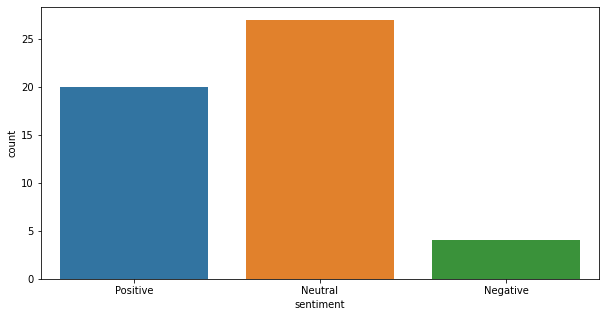

In [297]:
plt.figure(figsize=(10,5))
sns.countplot(tweets_df2['sentiment'])

<Figure size 720x360 with 0 Axes>

<AxesSubplot:ylabel='sentiment'>

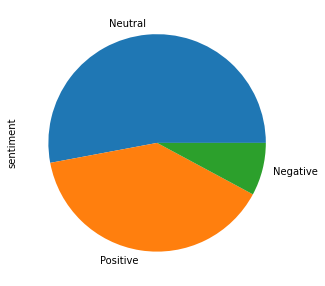

In [298]:
plt.figure(figsize=(10,5))
tweets_df2['sentiment'].value_counts().plot(kind='pie')

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='words', ylabel='scores'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'vaccine'),
  Text(1, 0, 'Moderna'),
  Text(2, 0, 'it’s'),
  Text(3, 0, 'patent'),
  Text(4, 0, 'covid'),
  Text(5, 0, '19'),
  Text(6, 0, 'dates'),
  Text(7, 0, '2016'),
  Text(8, 0, 'investigating'),
  Text(9, 0, 'outrageous'),
  Text(10, 0, 'propaganda'),
  Text(11, 0, 'effectiveness'),
  Text(12, 0, 'connection'),
  Text(13, 0, 'World'),
  Text(14, 0, 'Economic'),
  Text(15, 0, 'forum'),
  Text(16, 0, 'relevant'),
  Text(17, 0, 'investigation'),
  Text(18, 0, 'worthy'),
  Text(19, 0, 'public'),
  Text(20, 0, 'scrutiny'),
  Text(21, 0, 'Dare'),
  Text(22, 0, 'clear'),
  Text(23, 0, 'vaccinesonly'),
  Text(24, 0, 'panacea'),
  Text(25, 0, 'Covid19'),
  Text(26, 0, 'Pfizer'),
  Text(27, 0, 'particularly'),
  Text(28, 0, 'bad'),
  Text(29, 0, 'hitrate')])

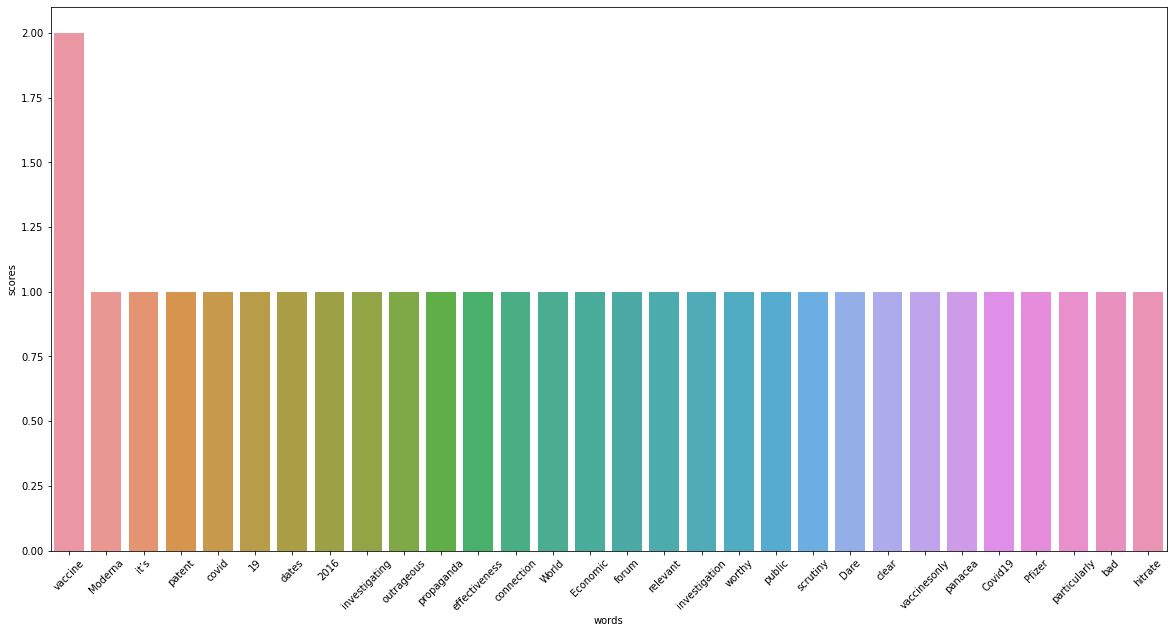

In [299]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xticks(rotation=45)
plt.show()

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='words', ylabel='scores'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'vaccine'),
  Text(1, 0, 'COVID19'),
  Text(2, 0, 'Covid19'),
  Text(3, 0, 'Pfizer'),
  Text(4, 0, 'vaccines'),
  Text(5, 0, 'children'),
  Text(6, 0, 'Dr'),
  Text(7, 0, 'effectiveness'),
  Text(8, 0, 'Omicron'),
  Text(9, 0, 'risk'),
  Text(10, 0, 'disease'),
  Text(11, 0, '12%'),
  Text(12, 0, 'infection'),
  Text(13, 0, 'vaccination'),
  Text(14, 0, 'doses'),
  Text(15, 0, 'received'),
  Text(16, 0, 'long'),
  Text(17, 0, 'best'),
  Text(18, 0, 'fell'),
  Text(19, 0, 'quickly'),
  Text(20, 0, 'kids'),
  Text(21, 0, 'surge'),
  Text(22, 0, 'offered'),
  Text(23, 0, 'protection'),
  Text(24, 0, 'severe'),
  Text(25, 0, 'stop'),
  Text(26, 0, 'called'),
  Text(27, 0, 'experts'),
  Text(28, 0, 'effective'),
  Text(29, 0, 'didn’t')])

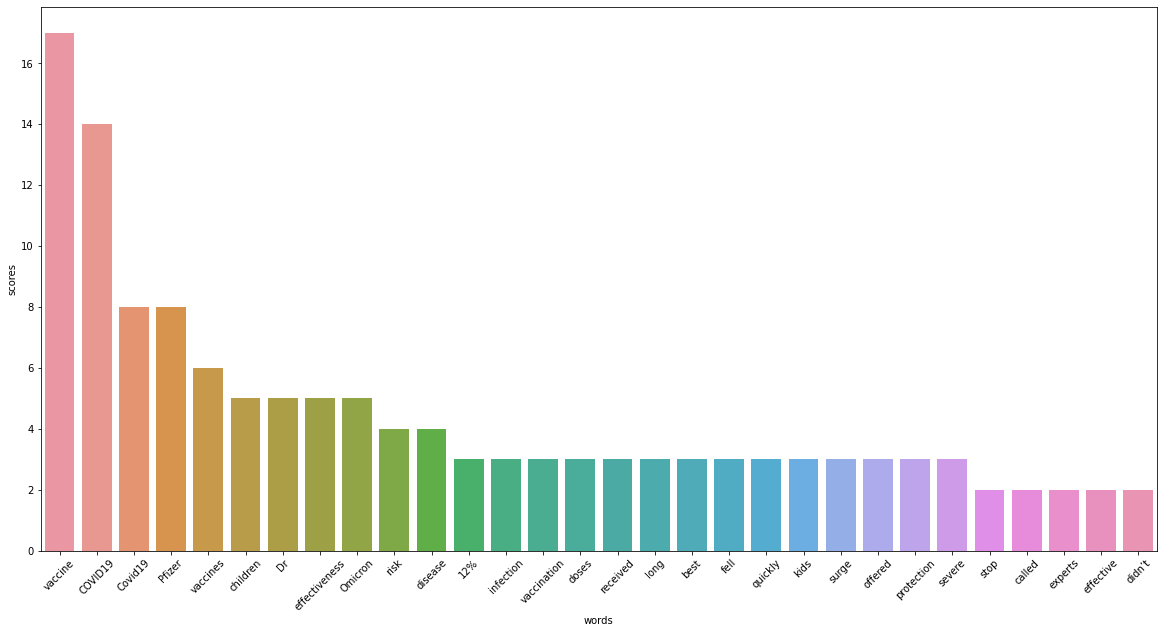

In [224]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xticks(rotation=45)
plt.show()

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='words', ylabel='scores'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '/'),
  Text(1, 0, 'COVID19'),
  Text(2, 0, 'Vaccine'),
  Text(3, 0, 'vaccine'),
  Text(4, 0, 'Rollout'),
  Text(5, 0, 'NSW:'),
  Text(6, 0, 'VIC:'),
  Text(7, 0, 'QLD:'),
  Text(8, 0, 'WA:'),
  Text(9, 0, 'SA:'),
  Text(10, 0, 'TAS:'),
  Text(11, 0, 'ACT:'),
  Text(12, 0, 'NT:'),
  Text(13, 0, 'Dr'),
  Text(14, 0, 'Malone:'),
  Text(15, 0, 'risk'),
  Text(16, 0, 'getting'),
  Text(17, 0, 'infected'),
  Text(18, 0, 'developing'),
  Text(19, 0, 'disease'),
  Text(20, 0, 'Omicron'),
  Text(21, 0, 'increases'),
  Text(22, 0, 'number'),
  Text(23, 0, 'shots'),
  Text(24, 0, 'youve'),
  Text(25, 0, 'received'),
  Text(26, 0, 'medical'),
  Text(27, 0, 'emergency'),
  Text(28, 0, 'Biden'),
  Text(29, 0, 'admin')])

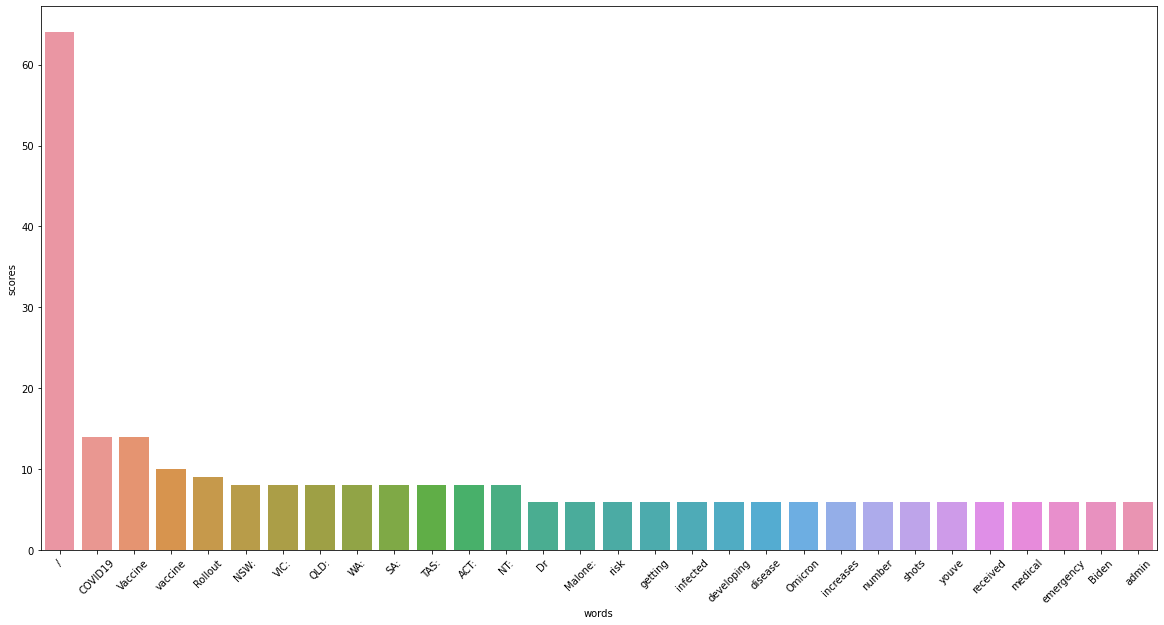

In [300]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neu_df)
plt.xticks(rotation=45)
plt.show()

In [301]:
conda install -c conda-forge wordcloud

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

# All requested packages already installed.



In [302]:
from wordcloud import WordCloud

In [303]:
# create text from all tweets
def plot_wordcloud(docx):
    mywordcloud=WordCloud().generate(docx)
    plt.figure(figsize=(10, 7))
    plt.imshow(mywordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()


In [304]:
pos_docx = ' '.join(pos_tokens)

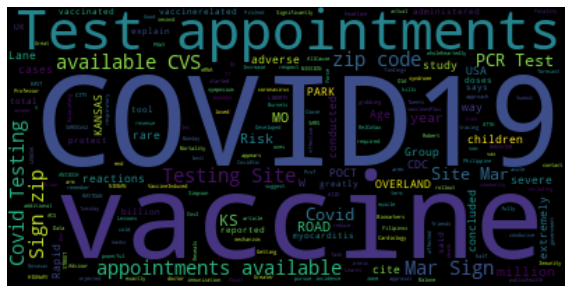

In [305]:
plot_wordcloud(pos_docx)

In [306]:
neg_docx = ' '.join(neg_tokens)

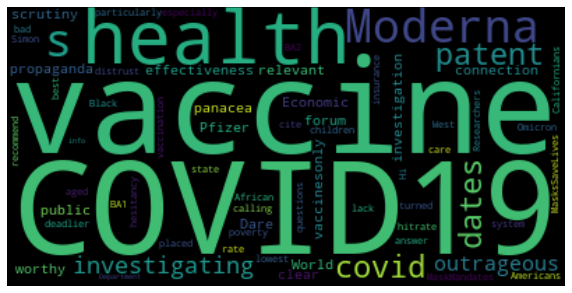

In [307]:
plot_wordcloud(neg_docx)

In [308]:
neu_docx = ' '.join(neu_tokens)

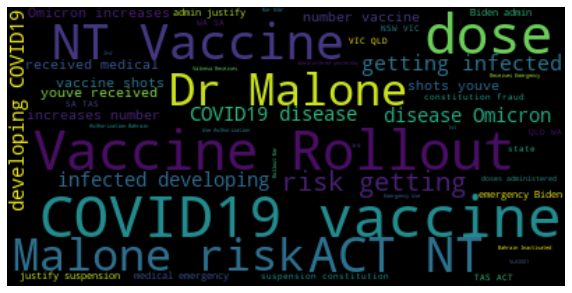

In [309]:
plot_wordcloud(neu_docx)